In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os
import numpy as np

#### 1. 讀取資料(並載入column names)

In [2]:
#資料集路徑
path = './dataset/CIC-IDS-2018-Dataset/'
normal_data_path = './dataset/CIC-IDS-2018-Dataset-normal/'
abnormal_data_path = './dataset/CIC-IDS-2018-Dataset-abnormal/'

In [3]:
if not os.path.exists(path):
    try:
        os.makedirs(path,mode=0o777)
    except:
        print("檔案夾已存在")    
if not os.path.exists(normal_data_path):
    try:
        os.makedirs(normal_data_path,mode=0o777)
    except:
        print("檔案夾已存在")       
    
if not os.path.exists(abnormal_data_path):
    try:
        os.makedirs(abnormal_data_path,mode=0o777)
    except:
        print("檔案夾已存在")

In [5]:
def extract_data(path,file,export_path,idx,mode):
    set = pd.read_csv(path+file)
    if(mode=='normal'):
        set[set['Label']=='Benign'].to_csv(export_path+'IDS2018_Abnormal'+"-"+str(idx)+'.csv')
    elif(mode=="abnormal"):
        set[set['Label']!='Benign'].to_csv(export_path+'IDS2018_Without_Abnormal'+'-'+str(idx)+'.csv')
    else:
        print("請輸入正確的模式:normal 或 abnormal")

In [4]:
filelist = os.listdir(path)
filelist

['combined_abnormal.csv',
 'combined_normal.csv',
 'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv']

In [6]:
filelist = os.listdir(path)
normal=[0,1,3,4,5,6,7,8,9] #其中有一個太大了，ram都不夠，就不載進來訓練了。
abnormal=[0,1,2,3,4,5,6,7,8,9]

In [10]:
for i in normal:
    print("正在處理"+filelist[i]+"...")
    if(filelist[i]!='Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv'):
        extract_data(path,filelist[i],normal_data_path,i,'normal')

正在處理Friday-02-03-2018_TrafficForML_CICFlowMeter.csv...
正在處理Friday-16-02-2018_TrafficForML_CICFlowMeter.csv...


c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


正在處理Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv...


In [11]:
for i in abnormal:
    print("正在處理"+filelist[i]+"...")
    extract_data(path,filelist[i],abnormal_data_path,i,'abnormal')

正在處理Friday-02-03-2018_TrafficForML_CICFlowMeter.csv...
正在處理Friday-16-02-2018_TrafficForML_CICFlowMeter.csv...


c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


正在處理Friday-23-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv...
正在處理Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv...


In [13]:
all_normal_file = os.listdir(normal_data_path)
training_data = pd.concat([pd.read_csv(normal_data_path+f) for f in all_normal_file])
training_data.to_csv(path+"combined_normal.csv", index=False)

In [14]:
all_abnormal_file = os.listdir(abnormal_data_path)
test_data = pd.concat([pd.read_csv(abnormal_data_path+f) for f in all_abnormal_file])
test_data.to_csv(path+"combined_abnormal.csv", index=False)

c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [4]:
training_data = pd.read_csv(path+"combined_normal.csv")
test_data = pd.read_csv(path+"combined_abnormal.csv")

c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,81,82,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
training_data.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       '

In [5]:
test_data.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       '

In [5]:
training_data.drop(columns=['Unnamed: 0','Timestamp','Flow Byts/s','Flow Pkts/s'],inplace=True)
test_data.drop(columns=['Unnamed: 0','Timestamp','Flow Byts/s','Flow Pkts/s','Flow ID', 'Src IP', 'Src Port', 'Dst IP'],inplace=True)

In [6]:
test_data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,8080,6,16079,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1,8080,6,577,2,0,0,0.0,0,0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
2,8080,6,10279,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
3,8080,6,457,2,0,0,0.0,0,0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
4,8080,6,10271,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748289,20000,6,2,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0.0,0,0,Infilteration
2748290,23,6,3,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0.0,0,0,Infilteration
2748291,425,6,2,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0.0,0,0,Infilteration
2748292,23,6,22,1,1,0,0,0,0,0,...,24,0,0,0,0,0,0.0,0,0,Infilteration


In [7]:
#輸出資料集特征，數量，和記錄
def print_dataset_info(dataframe):
    return 'Features：\n'+str(dataframe.columns)+'\n特征數：'+str(len(dataframe.keys()))+'\n總共：'+str(len(dataframe))+'條記錄'

In [8]:
#輸出訓練集/測試集的的特征欄位
print(print_dataset_info(training_data))
print('-----------------------------------')
print(print_dataset_info(test_data))
print('-----------------------------------')

Features：
Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',

#### 2. 處理資料集中的的Label

In [9]:
#統計訓練集/測試集的標籤數量
print(training_data['Label'].value_counts())
print('-----------------------------------')
print(test_data['Label'].value_counts())

Benign    5064142
Name: Label, dtype: int64
-----------------------------------
DDOS attack-HOIC            686012
DDoS attacks-LOIC-HTTP      576191
DoS attacks-Hulk            461912
Bot                         286191
FTP-BruteForce              193360
SSH-Bruteforce              187589
Infilteration               161934
DoS attacks-SlowHTTPTest    139890
DoS attacks-GoldenEye        41508
DoS attacks-Slowloris        10990
DDOS attack-LOIC-UDP          1730
Brute Force -Web               611
Brute Force -XSS               230
SQL Injection                   87
Label                           59
Name: Label, dtype: int64


In [10]:
test_data.drop(test_data.loc[test_data["Label"] == "Label"].index, inplace=True)

In [11]:
test_data["Protocol"].unique()
test_data["Protocol"]=pd.to_numeric(test_data["Protocol"],errors='coerce')

In [12]:
train_protocol_type = pd.get_dummies(training_data['Protocol'])
test_protocol_type = pd.get_dummies(test_data['Protocol'])

In [13]:
training_data.drop(['Protocol'],axis=1,inplace=True)
test_data.drop(['Protocol'],axis=1,inplace=True)

In [14]:
#再將one-hot encoding後的特征與原來的特征合併成一個dataframe
training_data = pd.concat([training_data,train_protocol_type],axis=1)
test_data = pd.concat([test_data,test_protocol_type],axis=1)

In [15]:
training_label=training_data['Label']
training_data.drop(['Label'],axis=1,inplace=True)
test_label=test_data['Label']
test_data.drop(['Label'],axis=1,inplace=True)

In [16]:
#建立MinMaxScaler物件
def minmax_scale(training_set,test_set):
    scaler = MinMaxScaler(feature_range=(0,1))
    training_set = pd.DataFrame(scaler.fit_transform(training_set), 
                                        columns=training_set.keys())
    test_set = pd.DataFrame(scaler.fit_transform(test_set), 
                                        columns=test_set.keys())
    return  training_set,test_set
training_data,test_data=minmax_scale(training_data,test_data)                   

c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\Administrator\anaconda3\envs\py37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An er

In [17]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [18]:
X_train,X_test = train_test_split(training_data,test_size=0.3,shuffle=True)
X_test,X_val = train_test_split(X_test,test_size=0.5,shuffle=True)

In [19]:
X_test['Label']=0
X_test.reset_index(inplace=True)
X_test.drop(columns=['index'],inplace=True)
X_test.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,0,6,17,Label
0,0.001221,0.999869,0.000016,0.000058,1.115021e-06,4.831683e-06,0.002498,0.000000,0.003247,0.005051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.750256,0.999874,0.000033,0.000043,6.475435e-06,3.653465e-06,0.014510,0.000000,0.011313,0.022723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.001221,0.999928,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.000809,0.999869,0.000000,0.000014,1.939168e-07,5.940594e-07,0.000435,0.019178,0.001694,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.546304,0.999874,0.000033,0.000043,6.475435e-06,3.247525e-06,0.014510,0.000000,0.011313,0.022723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [20]:
#features shape
input_shape = training_data.shape[1]
print("X_train.shape: '{train_shape}'\nX_test.shape:  '{test_shape}'\nX_val.shape '{val_shape}'\n".format(train_shape=X_train.shape, test_shape=X_test.shape,val_shape=X_val.shape))

X_train.shape: '(3544899, 78)'
X_test.shape:  '(759621, 79)'
X_val.shape '(759622, 78)'



In [18]:
def get_autoencoder_model(input_shape):
    autoencoder = keras.models.Sequential([
        # deconstruct / encode
        keras.layers.Dense(input_shape, activation='relu', input_shape=(input_shape, )), 
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(input_shape, activation='relu')
    ])
    autoencoder.compile(optimizer='sgd', loss='mean_absolute_error',metrics=["mae"])
    return autoencoder

autoencoder=get_autoencoder_model(input_shape)
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 78)                6162      
                                                                 
 dense_1 (Dense)             (None, 64)                5056      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
 dense_4 (Dense)             (None, 32)                192       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 78)                5

In [19]:
#Callback function，保存訓練過程中最好的結果
filepath='./checkpoint/'
my_callbacks = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [20]:
history = autoencoder.fit(X_train, X_train,
                epochs=250,
                batch_size=200,
                callbacks=my_callbacks,
                shuffle=True,
                validation_data=(X_val,X_val))

Epoch 1/250
17725/17725 [==============================] - 30s 2ms/step - loss: 0.0526 - mae: 0.0526 - val_loss: 0.0383 - val_mae: 0.0383
Epoch 2/250
17725/17725 [==============================] - 27s 2ms/step - loss: 0.0380 - mae: 0.0380 - val_loss: 0.0380 - val_mae: 0.0380
Epoch 3/250
17725/17725 [==============================] - 27s 2ms/step - loss: 0.0379 - mae: 0.0379 - val_loss: 0.0379 - val_mae: 0.0379
Epoch 4/250
17725/17725 [==============================] - 27s 2ms/step - loss: 0.0378 - mae: 0.0378 - val_loss: 0.0377 - val_mae: 0.0377
Epoch 5/250
17725/17725 [==============================] - 27s 2ms/step - loss: 0.0373 - mae: 0.0373 - val_loss: 0.0364 - val_mae: 0.0364
Epoch 6/250
17725/17725 [==============================] - 27s 2ms/step - loss: 0.0335 - mae: 0.0335 - val_loss: 0.0320 - val_mae: 0.0320
Epoch 7/250
17725/17725 [==============================] - 28s 2ms/step - loss: 0.0317 - mae: 0.0317 - val_loss: 0.0316 - val_mae: 0.0316
Epoch 8/250
17725/17725 [=========

In [21]:
model_path = './model/'
autoencoder.save(model_path+'saved_model_ids2018')

INFO:tensorflow:Assets written to: ./model/saved_model_ids2018\assets


In [21]:
model_path = './model/'
autoencoder = keras.models.load_model(model_path+'saved_model_ids2018')

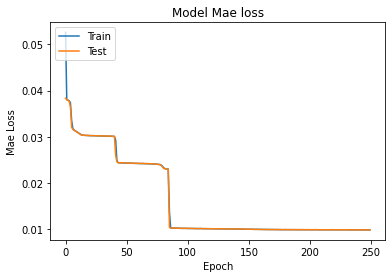

In [22]:
# 繪製訓練 & 驗證的Loss
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae loss')
plt.ylabel('Mae Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
reconstructions = autoencoder.predict(X_train)
#MAE公式
training_mae = np.mean(np.abs(reconstructions - X_train), axis=1)
#MAE的均值作為閾值
threshold = np.mean(training_mae)
print('training_mae Mean:'+str(np.mean(training_mae))+"\n"+"training_mae Max:"+str(np.max(training_mae)))

110779/110779 [==============================] - 77s 688us/step
training_mae Mean:0.009826578201977576
training_mae Max:0.13828616020369902


In [23]:
mean = training_mae.mean()
std=training_mae.std()
upper_value = mean + 3*std

In [24]:
test_data['Label']=1
testing_label = pd.concat([test_data['Label'],X_test['Label']],axis=0,ignore_index=True).reset_index(drop=True)
X_test.drop(columns=['Label'],inplace=True)
test_data.drop(columns=['Label'],inplace=True)

In [28]:
testing_label

0          1
1          1
2          1
3          1
4          1
          ..
3507851    0
3507852    0
3507853    0
3507854    0
3507855    0
Name: Label, Length: 3507856, dtype: int64

In [25]:
test_data = pd.concat([test_data,X_test],axis=0,ignore_index=True).reset_index(drop=True)

In [26]:
test_data

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,0,6,17
0,0.123300,0.000134,0.000006,0.000213,3.290228e-05,0.000005,0.173404,0.000000,0.074615,0.141584,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
1,0.123300,0.000005,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
2,0.123300,0.000086,0.000006,0.000213,3.290228e-05,0.000005,0.173404,0.000000,0.074615,0.141584,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
3,0.123300,0.000004,0.000003,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
4,0.123300,0.000086,0.000006,0.000213,3.290228e-05,0.000005,0.173404,0.000000,0.074615,0.141584,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507851,0.000809,0.999869,0.000000,0.000014,3.116519e-07,0.000001,0.000698,0.030822,0.002722,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0
3507852,0.001221,0.999869,0.000008,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
3507853,0.051713,0.999872,0.000074,0.000130,8.220686e-06,0.000016,0.010506,0.000000,0.007181,0.011288,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0
3507854,0.002106,0.999945,0.000008,0.000000,2.887975e-06,0.000000,0.003352,0.137671,0.012614,0.000576,...,0.0,0.000000,0.000000,0.000175,0.0,0.000071,0.000289,0.0,0.0,1.0


In [27]:
test_reconstructions = autoencoder.predict(test_data)
test_mae = np.mean(np.abs(test_data - test_reconstructions), axis=1)

109621/109621 [==============================] - 83s 752us/step


In [29]:
predicted_label = []
for value in test_mae:
    if value>threshold:
        predicted_label.append(1)
    else:
        predicted_label.append(0)

In [30]:
#參數：return_acc_pre_rec_f1s(真實值，預測值)
#輸出accuracy,precision,recall,f1_score
def return_acc_pre_rec_f1s(y_true,y_predicted):
    tn, fp, fn, tp = confusion_matrix(y_true, y_predicted, labels=[0,1]).ravel()
    #
    print("tn:"+str(tn)+"\nfp:"+str(fp)+"\nfn:"+str(fn)+"\ntp:"+str(tp))
    #
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2/((1/precision)+(1/recall))
    return accuracy,precision,recall,f1_score

In [31]:
#模型最後的預測結果
accuracy,precision,recall,f1_score=return_acc_pre_rec_f1s(list(testing_label), list(predicted_label))
print("accuracy '{accuracy}'\nprecision '{precision}'\nrecall '{recall}'\nf1_score '{f1_score}'".format(accuracy=accuracy, precision=precision,recall=recall,f1_score=f1_score))

tn:481758
fp:277863
fn:0
tp:2748235
accuracy '0.9207883675954771'
precision '0.9081777919948396'
recall '1.0'
f1_score '0.951879637007426'


In [32]:
Q1 = np.percentile(training_mae , 25)
Q3 = np.percentile(training_mae , 75)

# 2.
Q1,Q3 = np.percentile(training_mae , [25,75])

# Find IQR, upper limit, lower limit
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

# Find outliers
outliers = training_mae[(training_mae > ul) ]
#threshold=ul
print(ul)

0.042092671441798915


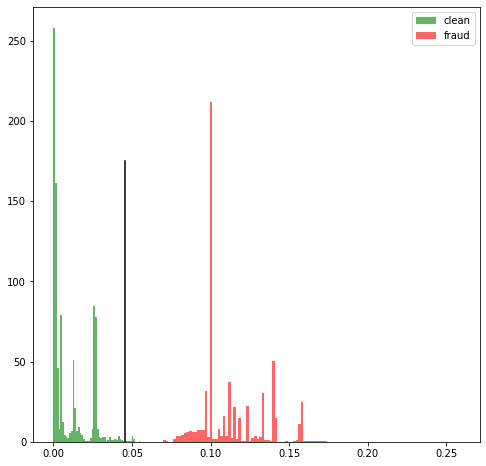

In [33]:
from turtle import color
import matplotlib.pyplot as plt

clean = test_mae[testing_label==0]
fraud = test_mae[testing_label==1]

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(clean, bins=120, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=120, density=True, label="fraud", alpha=.6, color="red")
ax.plot([upper_value,upper_value],[0,175],color="black")
plt.legend()
plt.show()

In [34]:
total = len(testing_label)

#攻擊小於等於閾值
tl1s= test_mae[testing_label==1]<=threshold
tl1s = (len(tl1s[tl1s==True])/total)*100
tl1s = np.around(tl1s,2)
#攻擊大於閾值
tl1m= test_mae[testing_label==1]>threshold
tl1m = (len(tl1m[tl1m==True])/total)*100
tl1m = np.around(tl1m,2)
#正常小於等於閾值
tl0s= test_mae[testing_label==0]<=threshold
tl0s = (len(tl0s[tl0s==True])/total)*100
tl0s = np.around(tl0s,2)
#攻擊大於閾值
tl0m= test_mae[testing_label==0]>threshold
tl0m = (len(tl0m[tl0m==True])/total)*100
tl0m = np.around(tl0m,2)

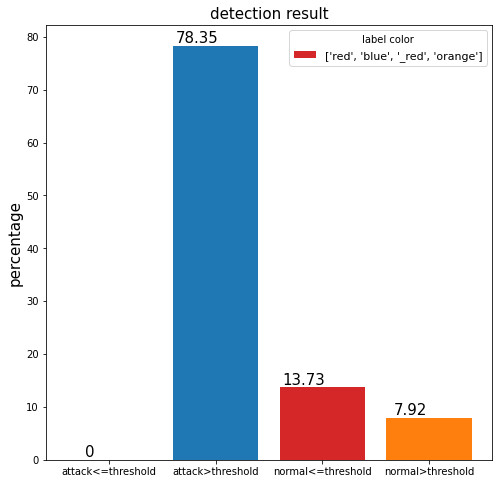

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
labels=['attack<=threshold','attack>threshold','normal<=threshold','normal>threshold']
data=[tl1s,tl1m,tl0s,tl0m]

bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

x = np.arange(len(labels))

width = 0.35
rects1 = ax.bar(x - width/2, data, width)

ax.bar_label(rects1,label_type='edge',fontsize=15)
ax.bar(labels, data, label=bar_labels, color=bar_colors)
ax.set_ylabel('percentage',fontsize=15)
ax.set_title('detection result',fontsize=15)
ax.legend(title='label color',fontsize=11)

plt.rcParams['font.family']='Microsoft JhengHei'
plt.show()

In [ ]:
# 可以輸出一些requirement的資訊
# import session_info
# session_info.show()